### 3. Feature Engineering

• The previous sections outline the fundamental ideas of machine learning, but all of the examples assume that you have numerical data in a tidy, [n_samples, n_features] format.

• In the real world, data rarely comes in such a form. With this in mind, one of the more important steps in using machine learning in practice is feature engineering: that is, taking whatever information you have about your problem and turning it into numbers that you can use to build your feature matrix.

• In this section, we will cover a few common examples of feature engineering tasks: features for representing categorical data, features for representing text, and features for representing images

• Additionally, we will discuss derived features for increasing model complexity and imputation of missing data. 

• Often this process is known as vectorization, as it involves converting arbitrary data into well-behaved vectors.

### Categorical Features

• One common type of non-numerical data is categorical data.

• For example, imagine you are exploring some data on housing prices, and along with numerical features like "price" and "rooms", you also have "neighborhood" information.

• For example, your data might look something like this:

In [4]:
data = [
    {'price' : 850000, 'rooms' : 4, 'neighborhood' : 'Queen Anne'},
    {'price' : 700000, 'rooms' : 3, 'neighborhood' : 'Fremont'},
    {'price' : 650000, 'rooms' : 3, 'neighborhood' : 'Wallingford'},
    {'price' : 600000, 'rooms' : 2, 'neighborhood' : 'Fremont'}
]

• You might be tempted to encode this data with a straightforward numerical mapping:

In [5]:
{'Queen Anne' : 1, 'Fremont' : 2, 'Wallingford' : 3}

{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3}

• It turns out that this is not generally a useful approach in Scikit-Learn: the package's models make the fundamental assumption that numerical features reflect algebraic quantities.

• Thus such a mapping would imply, for example, that Queen Anne < Fremont < Wallingford, or even that Wallingford - Queen Anne = Fremont, which (niche demographic jokes aside) does not make much sense.

• In this case, one proven technique is to use one-hot encoding, which effectively creates extra columns indicating the presence or absence of a category with a value of 1 or 0, respectively.

• When your data comes as a list of dictionaries, Scikit-Learn's DictVectorizer will do this for you:

In [6]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

• Notice that the 'neighborhood' column has been expanded into three separate columns, representing the three neighborhood labels, and that each row has a 1 in the column associated with its neighborhood.

• With these categorical features thus encoded, you can proceed as normal with fitting a Scikit-Learn model.

• To see the meaning of each column, you can inspect the feature names:

In [7]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

• There is one clear disadvantage of this approach: if your category has many possible values, this can greatly increase the size of your dataset.

• However, because the encoded data contains mostly zeros, a sparse output can be a very efficient solution:

In [8]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

• Many (though not yet all) of the Scikit-Learn estimators accept such sparse inputs when fitting and evaluating models.

• sklearn.preprocessing.OneHotEncoder and sklearn.feature_extraction.FeatureHasher are two additional tools that Scikit-Learn includes to support this type of encoding.

### Text Features

• Another common need in feature engineering is to convert text to a set of representative numerical values.

• For example, most automatic mining of social media data relies on some form of encoding the text as numbers.

• One of the simplest methods of encoding data is by word counts: you take each snippet of text, count the occurrences of each word within it, and put the results in a table.

• For example, consider the following set of three phrases:

In [10]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

• For a vectorization of this data based on word count, we could construct a column representing the word "problem," the word "evil," the word "horizon," and so on.

• While doing this by hand would be possible, the tedium can be avoided by using Scikit-Learn's CountVectorizer:

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

• The result is a sparse matrix recording the number of times each word appears; it is easier to inspect if we convert this to a DataFrame with labeled columns:

In [18]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


• There are some issues with this approach, however: the raw word counts lead to features which put too much weight on words that appear very frequently, and this can be sub-optimal in some classification algorithms.

• One approach to fix this is known as term frequency-inverse document frequency (TF–IDF) which weights the word counts by a measure of how often they appear in the documents.

• The syntax for computing these features is similar to the previous example:

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


### Image Features

• Another common need is to suitably encode images for machine learning analysis.

• The simplest approach is what we used for the digits data in Introducing Scikit-Learn: simply using the pixel values themselves.

• But depending on the application, such approaches may not be optimal.

• A comprehensive summary of feature extraction techniques for images is well beyond the scope of this section, but you can find excellent implementations of many of the standard approaches in the Scikit-Image project.

• For one example of using Scikit-Learn and Scikit-Image together, see Feature Engineering: Working with Images.

### Derived Features

• Another useful type of feature is one that is mathematically derived from some input features.

• We saw an example of this in Hyperparameters and Model Validation when we constructed polynomial features from our input data.

• We saw that we could convert a linear regression into a polynomial regression not by changing the model, but by transforming the input!

• This is sometimes known as basis function regression, and is explored further in In Depth: Linear Regression.

• For example, this data clearly cannot be well described by a straight line:

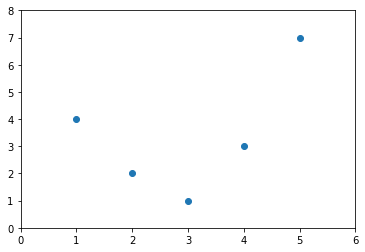

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.xlim(0, 6)
plt.ylim(0, 8)
plt.scatter(x, y);

• Still, we can fit a line to the data using LinearRegression and get the optimal result:

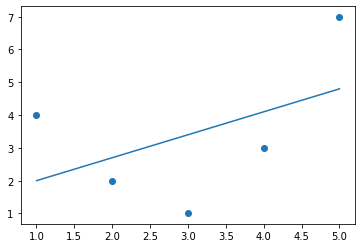

In [29]:
from sklearn.linear_model import LinearRegression

X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

• It's clear that we need a more sophisticated model to describe the relationship between x and y.

• One approach to this is to transform the data, adding extra columns of features to drive more flexibility in the model. For example, we can add polynomial features to the data this way: